# Read-me

- In this notebook, we investigate the dataset and try to find patterns in relation to fraud ocurrings.
- We observe data structure, columns, informations. 
- We try to answer questions transforming and aggregating data.
- All the analysis are presented in cells.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('data/data.csv',sep=';')
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000,"4884,61",63500,"2122,83",10,13,0,35,11,0,0
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800,1800,3600,0,0,2,0,0,11,0,0
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,"159,9","104,9","209,8","77,78",0,2,0,14,11,0,0
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600,600,1800,0,0,3,0,18,11,0,0
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941,"1764,6",8823,"657,63",2,5,0,65,12,0,0


- From the df.head() we can observate float values are in portuguese format. To pandas understand we need to transform to english format.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9277 entries, 0 to 9276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mes_ref               9277 non-null   object
 1   company_id            9277 non-null   object
 2   tipo_doc              9277 non-null   object
 3   max_valor_boleto      9277 non-null   object
 4   avg_valor_boleto      9277 non-null   object
 5   total_valor_boleto    9277 non-null   object
 6   valor_boleto_stdv     9277 non-null   object
 7   qtd_boleto_pago       9277 non-null   int64 
 8   qtd_boleto_total      9277 non-null   int64 
 9   qtd_boleto_estorno    9277 non-null   int64 
 10  qnt_cc_total          9277 non-null   int64 
 11  tempo_credenciamento  9277 non-null   int64 
 12  conta_bnk_repetida    9277 non-null   int64 
 13  fraude                9277 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 1014.8+ KB


# Prepare data

##  Transforming portuguese float to english float

In [8]:
from lib.utils import *

In [9]:
df = change_portuguese_to_english_cols(df)


- Here we try to find null columns

In [10]:
df.isnull().sum()

mes_ref                 0
company_id              0
tipo_doc                0
max_valor_boleto        0
avg_valor_boleto        0
total_valor_boleto      0
valor_boleto_stdv       0
qtd_boleto_pago         0
qtd_boleto_total        0
qtd_boleto_estorno      0
qnt_cc_total            0
tempo_credenciamento    0
conta_bnk_repetida      0
fraude                  0
dtype: int64

# EDA

## How months in the year are related to fraud occurring?

- In this cell, we are trying to investigate if time information can help in fraud occurring.

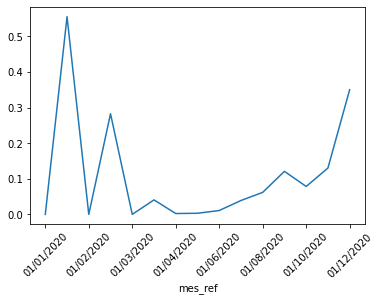

In [11]:
df.groupby('mes_ref').fraude.mean().plot()
plt.xticks(rotation=45)
plt.show()

 - We can observe frauds occuring more at the beginning and end of the year.

## How account type frequency is related to fraud occuring?

- Most of frauds occur in cpf account types

<AxesSubplot:xlabel='tipo_doc'>

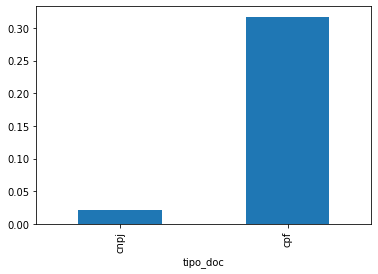

In [12]:
df.groupby('tipo_doc').fraude.mean().plot.bar()

## How max_valor_boleto is distributed? How fraud is related to this variable?

<AxesSubplot:>

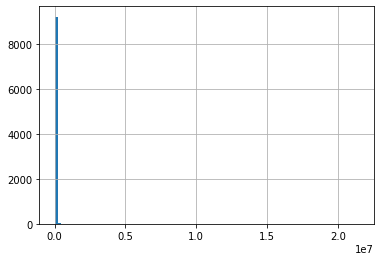

In [15]:
df.max_valor_boleto.hist(bins=100)

- here we observe this variable has too high values and a skewed distribution. We applied a log transformation to decrease the distortion.

In [116]:
from math import log
df['max_valor_boleto_log'] = df.max_valor_boleto.apply(log)
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,max_valor_boleto_log
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,8.699515
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,7.495542
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,5.074549
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,6.396930
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,7.986505


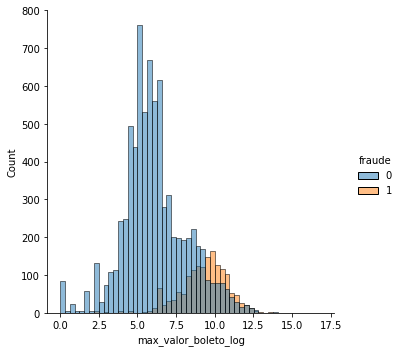

In [117]:
sns.displot(data=df, x="max_valor_boleto_log", hue="fraude")

## How avg_valor_boleto is distributed? How fraud is related to this variable?

<AxesSubplot:>

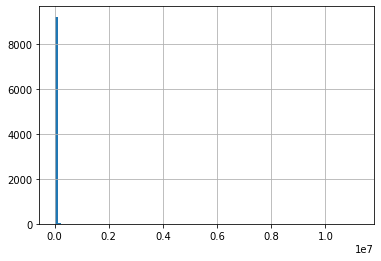

In [16]:
df.avg_valor_boleto.hist(bins=100)

- The distribution is too much skewed. We apply log to fix distortion and observe correlation with fraud occurring.

In [77]:
from math import log
df['avg_valor_boleto_log'] = df.avg_valor_boleto.apply(log)
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,qtd_bolet_pago_binned,qtd_boleto_estorno_binned,qtd_boleto_total_binned,qnt_cc_total_binned,avg_valor_boleto_log
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,"(8.0, 10.0]","(-0.001, 25.0]","(12.0, 14.0]","(16.0, 528.0]",8.493845
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(0.999, 2.0]","(-0.001, 1.0]",7.495542
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(0.999, 2.0]","(6.0, 16.0]",4.653008
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(2.0, 3.0]","(16.0, 528.0]",6.396930
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,"(1.0, 2.0]","(-0.001, 25.0]","(4.0, 5.0]","(16.0, 528.0]",7.475679


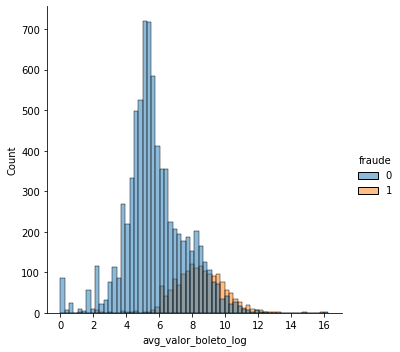

In [78]:
sns.displot(data=df, x="avg_valor_boleto_log", hue="fraude")

- From this plot we can observe frauds are more frequent in high values in this variable. 
- **We use this graph to create a rule based baseline. **


## How total_valor_boleto is distributed? How fraud is related to this variable?

<AxesSubplot:>

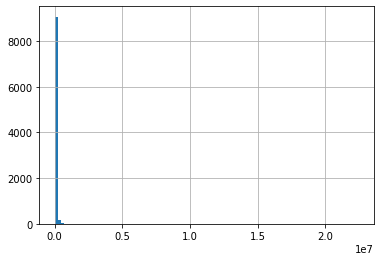

In [17]:
df.total_valor_boleto.hist(bins=100)

- The distribution is too much skewed. We apply log to fix distortion and observe correlation with fraud occurring.

In [122]:
from math import log
df['total_valor_boleto_log'] = df.total_valor_boleto.apply(log)
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,max_valor_boleto_log,avg_valor_boleto_log,total_valor_boleto_log
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,8.699515,8.493845,11.058795
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,7.495542,7.495542,8.188689
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,5.074549,4.653008,5.346155
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,6.396930,6.396930,7.495542
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,7.986505,7.475679,9.085117


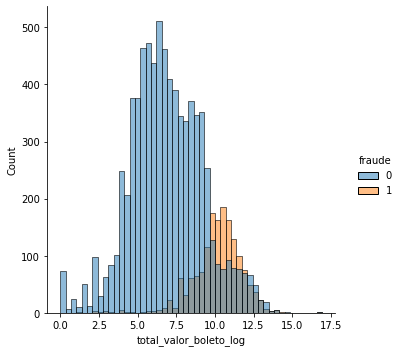

In [123]:
sns.displot(data=df, x="total_valor_boleto_log", hue="fraude")

- From this plot we can observe frauds are more frequent in high values in this variable.

## How valor_boleto_stdv is distributed? How fraud is related to this variable?

<AxesSubplot:>

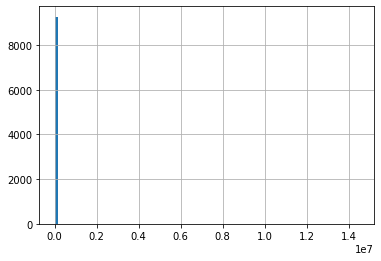

In [18]:
df.valor_boleto_stdv.hist(bins=100)

- The distribution is too much skewed. We apply log to fix distortion and observe correlation with fraud occurring.

In [125]:
from math import log
df['valor_boleto_stdv_log'] = (df.valor_boleto_stdv + 1).apply(log)
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,max_valor_boleto_log,avg_valor_boleto_log,total_valor_boleto_log,valor_boleto_stdv_log
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,8.699515,8.493845,11.058795,7.660976
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,7.495542,7.495542,8.188689,0.000000
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,5.074549,4.653008,5.346155,4.366659
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,6.396930,6.396930,7.495542,0.000000
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,7.986505,7.475679,9.085117,6.490162


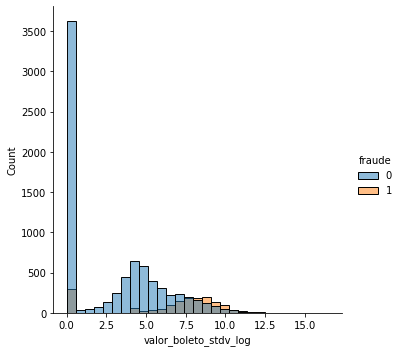

In [126]:
sns.displot(data=df, x="valor_boleto_stdv_log", hue="fraude")

- From this plot we can observe frauds are more frequent in high values in this variable.

## Fraud frequency by qtd_boleto_pago

<AxesSubplot:>

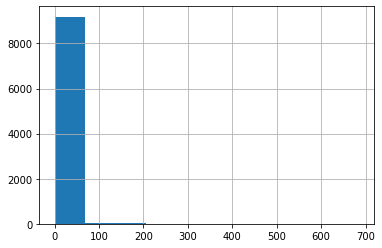

In [19]:
df.qtd_boleto_pago.hist()

- To fix distortion we apply feature binning technique.

In [21]:
df['qtd_bolet_pago_binned'] = pd.qcut(df.qtd_boleto_pago, 100,duplicates='drop')
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,qtd_bolet_pago_binned
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,"(8.0, 10.0]"
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,"(-0.001, 1.0]"
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,"(-0.001, 1.0]"
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,"(-0.001, 1.0]"
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,"(1.0, 2.0]"


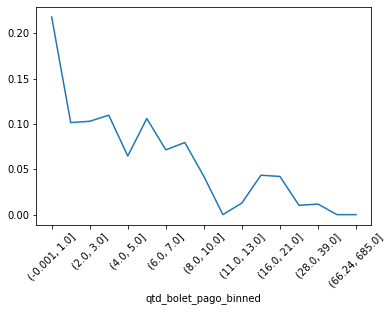

In [129]:
df.groupby('qtd_bolet_pago_binned').fraude.mean().plot()
plt.xticks(rotation=45)
plt.show()

- We can observe the more qtd_bolet_pago grows, the greater the probability that fraud will not occur.

## Fraud frequency by qtd_boleto_total

<AxesSubplot:>

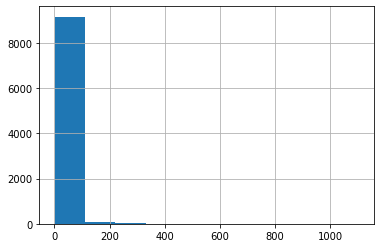

In [29]:
df.qtd_boleto_total.hist()

- To fix distortion we apply feature binning technique.

In [56]:
df['qtd_boleto_total_binned'] = pd.qcut(df.qtd_boleto_total, 100,duplicates='drop')
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,qtd_bolet_pago_binned,qtd_boleto_estorno_binned,qtd_boleto_total_binned
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,"(8.0, 10.0]","(-0.025, 2.5]","(12.0, 14.0]"
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,"(-0.001, 1.0]","(-0.025, 2.5]","(0.999, 2.0]"
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,"(-0.001, 1.0]","(-0.025, 2.5]","(0.999, 2.0]"
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,"(-0.001, 1.0]","(-0.025, 2.5]","(2.0, 3.0]"
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,"(1.0, 2.0]","(-0.025, 2.5]","(4.0, 5.0]"


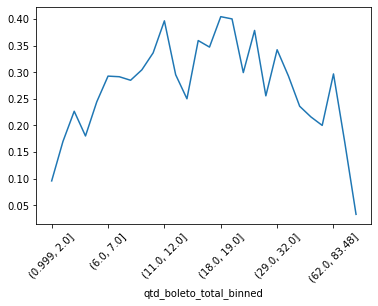

In [57]:
df.groupby('qtd_boleto_total_binned').fraude.mean().plot()
plt.xticks(rotation=45)
plt.show()

- This feature shows the relationship with fraud occur is variable and non-linear.

## Fraud frequency by qtd_boleto_estorno

<AxesSubplot:>

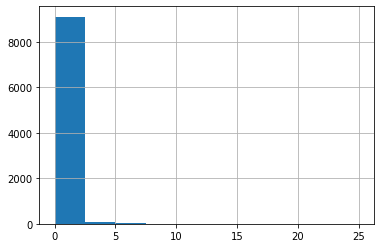

In [58]:
df.qtd_boleto_estorno.hist()

- To fix distortion we apply feature binning technique.

In [61]:
df['qtd_boleto_estorno_binned'] = pd.qcut(df.qtd_boleto_estorno, 10,duplicates='drop')
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,qtd_bolet_pago_binned,qtd_boleto_estorno_binned,qtd_boleto_total_binned
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,"(8.0, 10.0]","(-0.001, 25.0]","(12.0, 14.0]"
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(0.999, 2.0]"
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(0.999, 2.0]"
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(2.0, 3.0]"
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,"(1.0, 2.0]","(-0.001, 25.0]","(4.0, 5.0]"


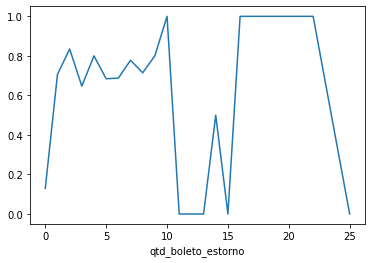

In [64]:
df.groupby('qtd_boleto_estorno').fraude.mean().plot()
plt.show()

- This feature shows the relationship with fraud occur is variable and non-linear.

## Fraud frequency by qnt_cc_total

<AxesSubplot:>

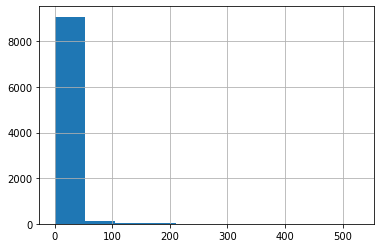

In [68]:
df.qnt_cc_total.hist()

- To fix distortion we apply feature binning technique.

In [66]:
df['qnt_cc_total_binned'] = pd.qcut(df.qnt_cc_total, 10,duplicates='drop')
df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude,qtd_bolet_pago_binned,qtd_boleto_estorno_binned,qtd_boleto_total_binned,qnt_cc_total_binned
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000.000000,4884.609863,63500.000000,2122.830078,10,13,0,35,11,0,0,"(8.0, 10.0]","(-0.001, 25.0]","(12.0, 14.0]","(16.0, 528.0]"
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800.000000,1800.000000,3600.000000,0.000000,0,2,0,0,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(0.999, 2.0]","(-0.001, 1.0]"
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,159.899994,104.900002,209.800003,77.779999,0,2,0,14,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(0.999, 2.0]","(6.0, 16.0]"
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600.000000,600.000000,1800.000000,0.000000,0,3,0,18,11,0,0,"(-0.001, 1.0]","(-0.001, 25.0]","(2.0, 3.0]","(16.0, 528.0]"
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941.000000,1764.599976,8823.000000,657.630005,2,5,0,65,12,0,0,"(1.0, 2.0]","(-0.001, 25.0]","(4.0, 5.0]","(16.0, 528.0]"


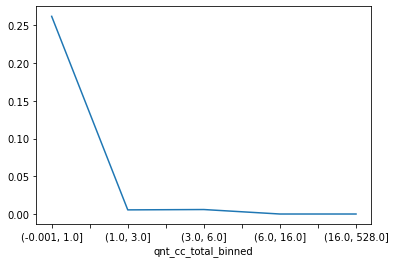

In [67]:
df.groupby('qnt_cc_total_binned').fraude.mean().plot()
plt.show()

- We can observe the higher qnt_cc_total_binned grows, the lower is the probability of fraud.

## Fraud frequency by tempo_credenciamento

<AxesSubplot:>

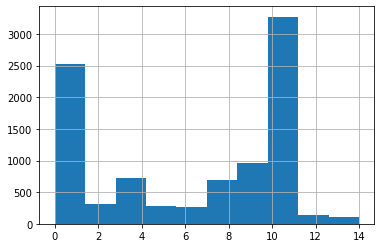

In [69]:
df.tempo_credenciamento.hist()

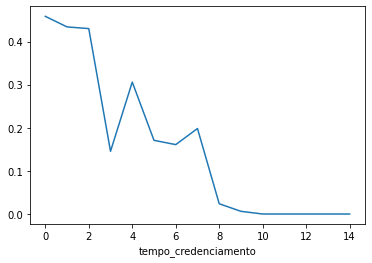

In [139]:
df.groupby('tempo_credenciamento').fraude.mean().plot()
plt.show()

- As the accreditation time grows, the lower the probability of fraud occuring.

## conta_bnk_repetida vs fraude

<AxesSubplot:>

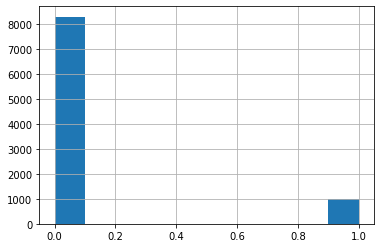

In [70]:
df.conta_bnk_repetida.hist()

- For categorical variables we can count the frequency considering fraud.

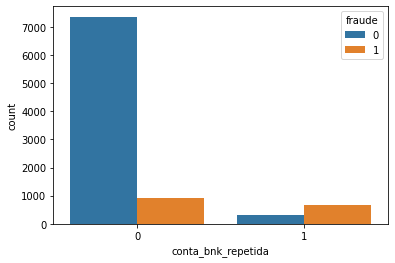

In [142]:
# df[['conta_bnk_repetida','fraude']].value_counts()
ax = sns.countplot(x="conta_bnk_repetida", hue="fraude", data=df)

- This graph informs fraud occur more when conta_bnk_repetida is zero.

## How fraud labels are distributed?

- Here we are observing how the class are imbalanced

<AxesSubplot:>

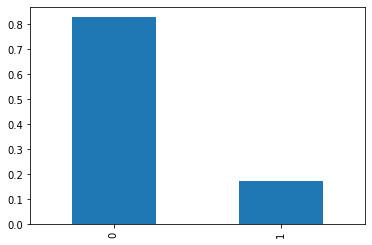

In [71]:
df.fraude.value_counts(normalize=True).plot.bar()

## Correlation Matrix

- In this section, we plot correlation matrix to observe if are columns that are too much linear correlated. If the value is larger than 0.99 we will remove.

In [72]:
orig_df = pd.read_csv('data/data.csv',sep=';')
orig_df.head()

,mes_ref,company_id,tipo_doc,max_valor_boleto,avg_valor_boleto,total_valor_boleto,valor_boleto_stdv,qtd_boleto_pago,qtd_boleto_total,qtd_boleto_estorno,qnt_cc_total,tempo_credenciamento,conta_bnk_repetida,fraude
0,01/03/2020,5e74d202d1498c5bdf8aafe3,cnpj,6000,"4884,61",63500,"2122,83",10,13,0,35,11,0,0
1,01/03/2020,5e78dafeb5ac867c7e85eb5e,cnpj,1800,1800,3600,0,0,2,0,0,11,0,0
2,01/03/2020,5e73e21359193c2f123c1076,cnpj,"159,9","104,9","209,8","77,78",0,2,0,14,11,0,0
3,01/04/2020,5e7262c49d55ea5dbea59d57,cnpj,600,600,1800,0,0,3,0,18,11,0,0
4,01/04/2020,5e610d9f66945c0f82dd357f,cnpj,2941,"1764,6",8823,"657,63",2,5,0,65,12,0,0


In [73]:
orig_df = change_portuguese_to_english_cols(orig_df)

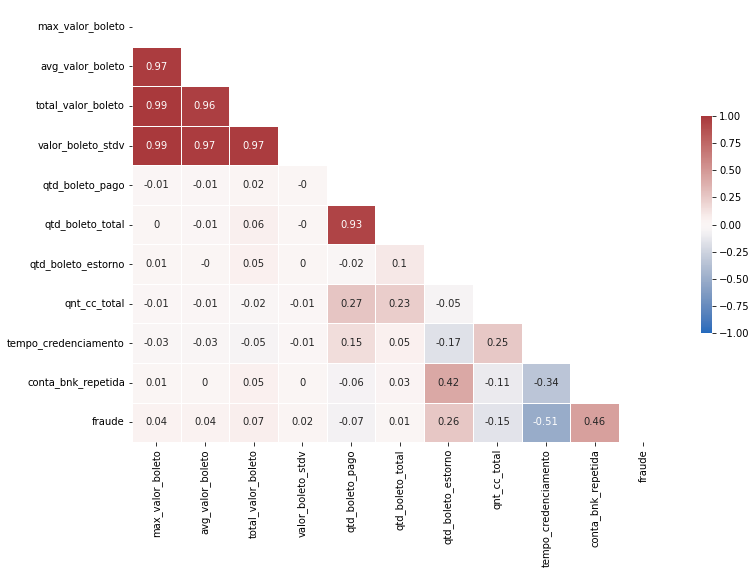

In [74]:
f = plt.figure(figsize=(12, 8))
matrix = orig_df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, 
            center=0, cmap='vlag', mask=mask,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

- Here we observe max_valor_boleto and total_valor_boleto are too much linear correlated.

## Bivariate analysis

- In this cells, we are ploting bivariate analysis. We cross most important features, in related to the pearson correlation and observe if are way to classify the data as fraud or non-fraud.

In [79]:
feats = ['avg_valor_boleto_log', 'qtd_boleto_total', 'qtd_boleto_estorno', 'tempo_credenciamento', 'conta_bnk_repetida', 'fraude']

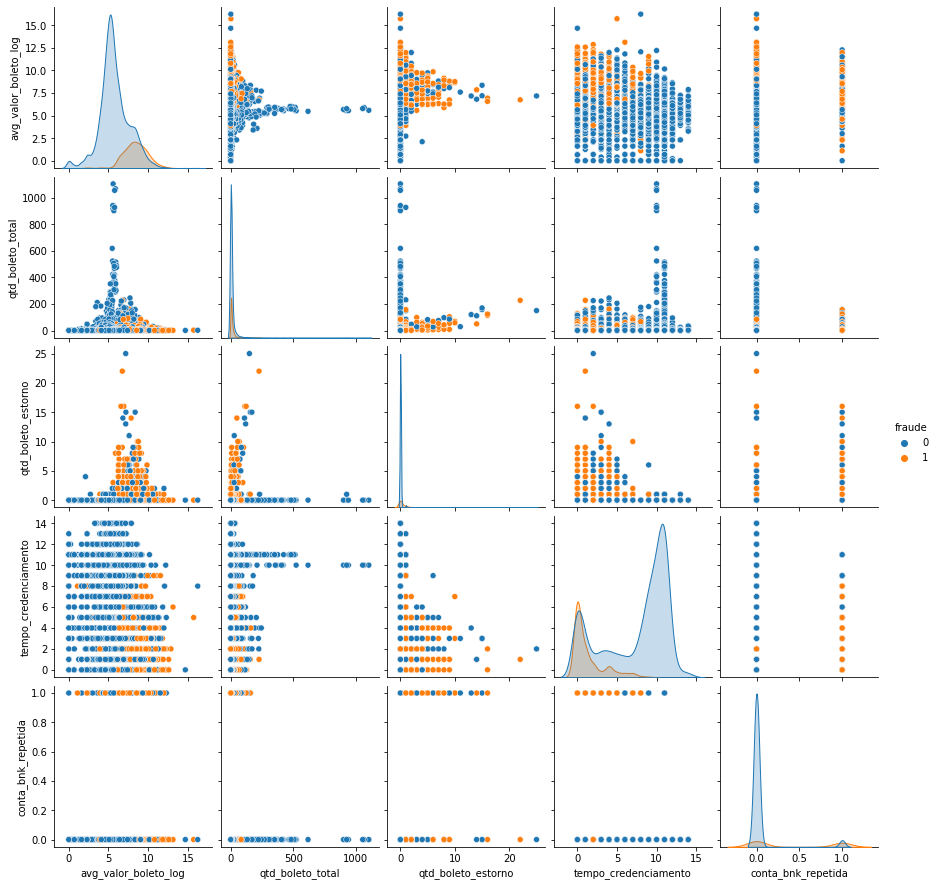

In [80]:
sns.pairplot(df[feats],hue='fraude')

## TSNE

- In this section, we try to plot features versus fraud class, to observe if the features are enough to classify a data as a fraud or non-fraud.

In [178]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

pca = TSNE(n_components=2,verbose=1)
orig_df['tipo_doc'] = orig_df.tipo_doc.astype('category').cat.codes

principalComponents = pca.fit_transform(orig_df[orig_df.columns[2:-1]])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['p1', 'p2'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9277 samples in 0.013s...
[t-SNE] Computed neighbors for 9277 samples in 0.241s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9277
[t-SNE] Computed conditional probabilities for sample 2000 / 9277
[t-SNE] Computed conditional probabilities for sample 3000 / 9277
[t-SNE] Computed conditional probabilities for sample 4000 / 9277
[t-SNE] Computed conditional probabilities for sample 5000 / 9277
[t-SNE] Computed conditional probabilities for sample 6000 / 9277
[t-SNE] Computed conditional probabilities for sample 7000 / 9277
[t-SNE] Computed conditional probabilities for sample 8000 / 9277
[t-SNE] Computed conditional probabilities for sample 9000 / 9277
[t-SNE] Computed conditional probabilities for sample 9277 / 9277
[t-SNE] Mean sigma: 5.972632
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.735947
[t-SNE] KL divergence after 1000 iterations: 0.675034


In [179]:
principalDf['label'] = orig_df['fraude']
principalDf.head()

,p1,p2,label
0,-47.940403,1.507651,0
1,38.319538,-11.512020,0
2,-16.595100,-50.629257,0
3,57.406773,-32.992809,0
4,22.840147,13.954617,0


In [180]:
principalDf.label.value_counts()

0    7683
1    1594
Name: label, dtype: int64

<AxesSubplot:xlabel='p1', ylabel='p2'>

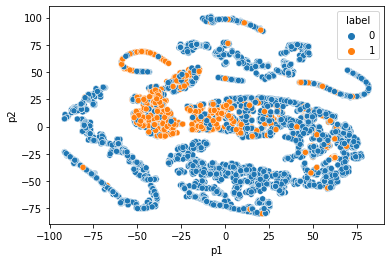

In [181]:
sns.scatterplot(data=principalDf,x='p1',y='p2',hue='label')